In [7]:
sqrt((2678.66 - 2676.29) / 2678.66)
sqrt((3487.37 - 2676.29) / 3487.37)

[1] 0.0297451

[1] 0.4822618

Warning message in read.spss("./2017_Questionnaire_1_cleaned.sav"):
“./2017_Questionnaire_1_cleaned.sav: File-indicated value is different from internal value for at least one of the three system values.  SYSMIS: indicated -1.79769e+308, expected -1.79769e+308; HIGHEST: 1.79769e+308, 1.79769e+308; LOWEST: -1.79769e+308, -1.79769e+308”Warning message in read.spss("./2017_Questionnaire_1_cleaned.sav"):
“./2017_Questionnaire_1_cleaned.sav: Unrecognized record type 7, subtype 18 encountered in system file”

     Weight          Height           Age       
 Min.   :40.00   Min.   :150.0   Min.   :18.00  
 1st Qu.:55.00   1st Qu.:164.0   1st Qu.:22.00  
 Median :61.00   Median :170.0   Median :23.00  
 Mean   :63.51   Mean   :170.2   Mean   :25.15  
 3rd Qu.:71.00   3rd Qu.:177.0   3rd Qu.:26.00  
 Max.   :99.00   Max.   :196.0   Max.   :49.00  

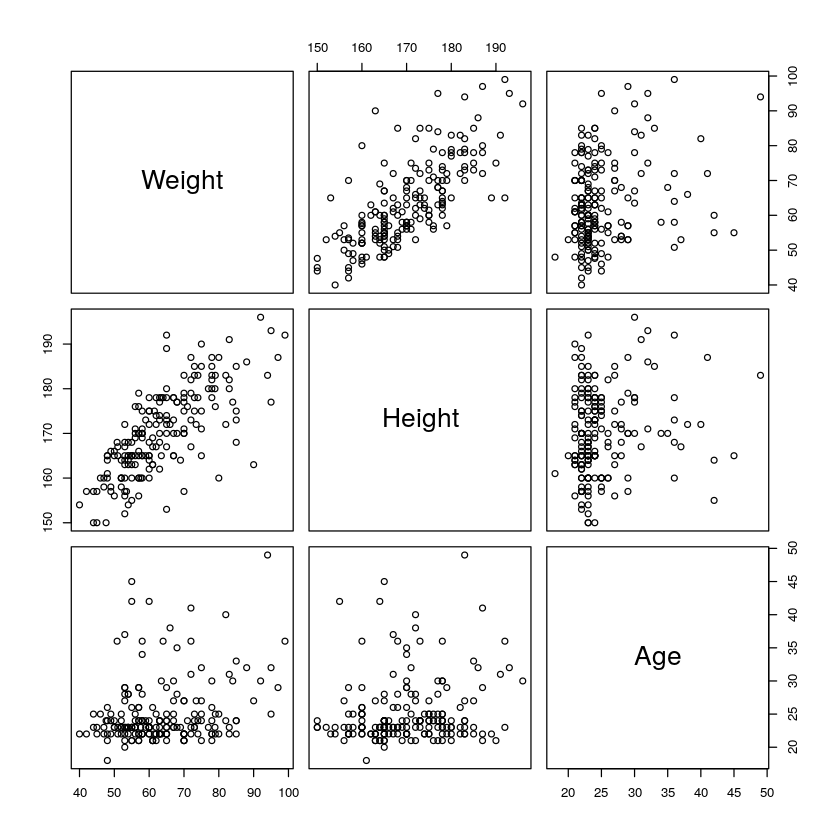

In [41]:
library(foreign)
d <- as.data.frame(read.spss("./2017_Questionnaire_1_cleaned.sav"))
d <- d[,c("Weight", "Height","Age")]
d <- d[complete.cases(d),]
summary(d)
pairs(d)

In [39]:
model <- lm(Weight ~ Height + Age, data=d)
summary(model)


Call:
lm(formula = Weight ~ Height + Age, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.296  -5.715  -0.865   4.533  32.293 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -96.66691   10.59289  -9.126  < 2e-16 ***
Height        0.89295    0.06256  14.274  < 2e-16 ***
Age           0.32677    0.12106   2.699  0.00759 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.087 on 186 degrees of freedom
Multiple R-squared:  0.553,	Adjusted R-squared:  0.5482 
F-statistic: 115.1 on 2 and 186 DF,  p-value: < 2.2e-16


In [45]:
predictors <- as.matrix(d[,c("Height","Age")])
mahal <- mahalanobis(predictors, colMeans(predictors), cov(predictors))
d[which(mahal >= qchisq(1-.05,df=ncol(predictors))),]

,Weight,Height,Age
17,53,167,37
20,82,172,40
39,60,164,42
40,72,187,41
67,58,160,36
127,94,183,49
129,99,192,36
150,95,193,32
156,55,165,45
158,92,196,30


In [46]:
lever <- hatvalues(model)
d[which(lever > (2*4)/nrow(d)),]

,Weight,Height,Age
20,82,172,40
39,60,164,42
40,72,187,41
127,94,183,49
129,99,192,36
156,55,165,45
158,92,196,30
183,55,155,42


In [49]:
sdr <- rstudent(model)
qt(1-(.05/2)/nrow(d),df=nrow(d)-4-1)
d[which(abs(sdr) >= qt(1-(.05/2)/nrow(d),df=nrow(d)-4-1)),]

[1] 3.719902

,Weight,Height,Age
19,90,163,27


In [52]:
cooksd <- cooks.distance(model)
summary(cooksd)
d[which(cooksd >= 2),]

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0002528 0.0014160 0.0059900 0.0040610 0.1116000 

Weight,Height,Age


In [63]:
d2 <- d[!(mahal >= qchisq(1-.05,df=ncol(predictors))),]
nrow(d)
model2 <- lm(Weight ~ Height + Age, data=d2)
summary(model2)

[1] 189


Call:
lm(formula = Weight ~ Height + Age, data = d2)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.242  -5.507  -0.687   4.520  32.012 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -89.14629   11.59805  -7.686 1.06e-12 ***
Height        0.84767    0.06735  12.586  < 2e-16 ***
Age           0.33202    0.19098   1.738   0.0839 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.028 on 174 degrees of freedom
Multiple R-squared:  0.4999,	Adjusted R-squared:  0.4942 
F-statistic: 86.98 on 2 and 174 DF,  p-value: < 2.2e-16


[1] -2.710409e-17

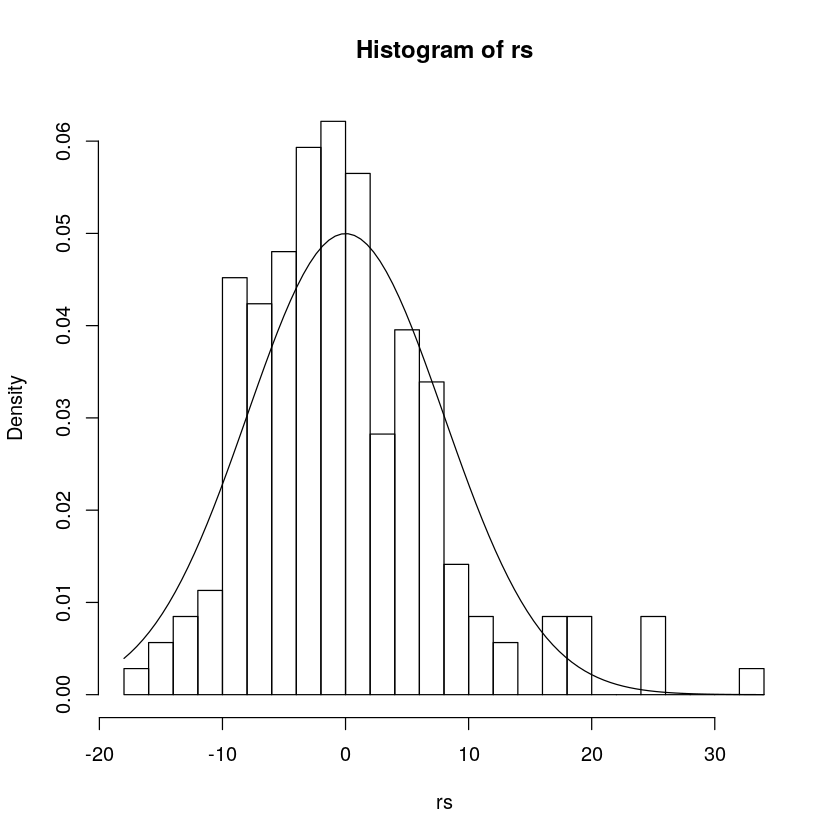

In [101]:
rs <- residuals(model2)
mean(rs) / sd(rs)
hist(rs,prob=TRUE, breaks=20)
curve(dnorm(x,mean=0,sd=sd(rs)),add=TRUE)

In [78]:
# install.packages("car")
# library(car)
# 1/vif(model2)

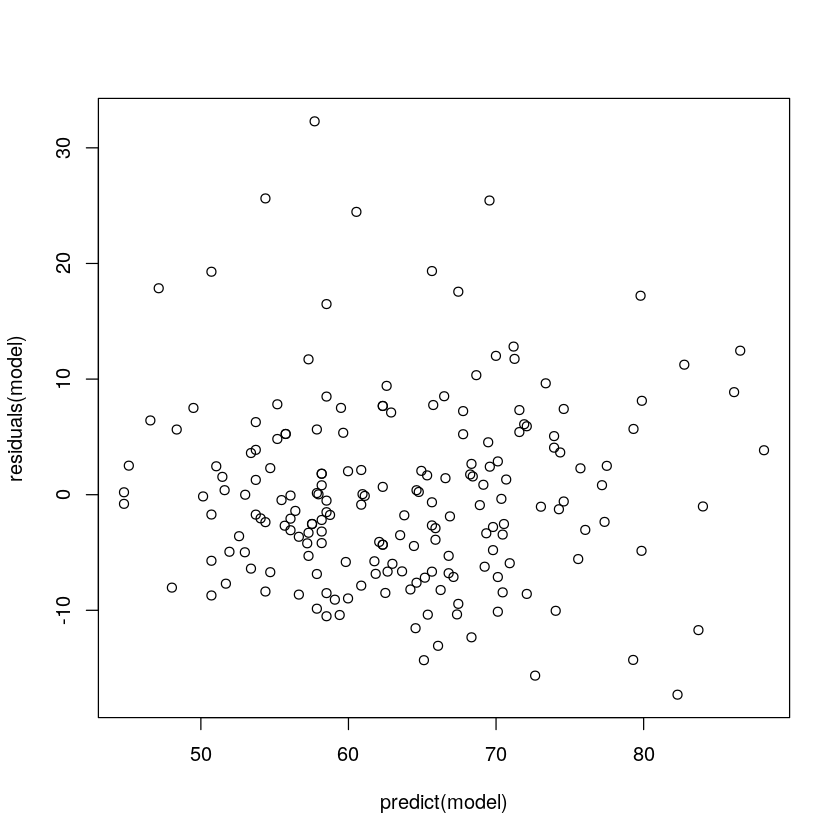

In [91]:
plot(predict(model),residuals(model))
abline(a=0, b=1)

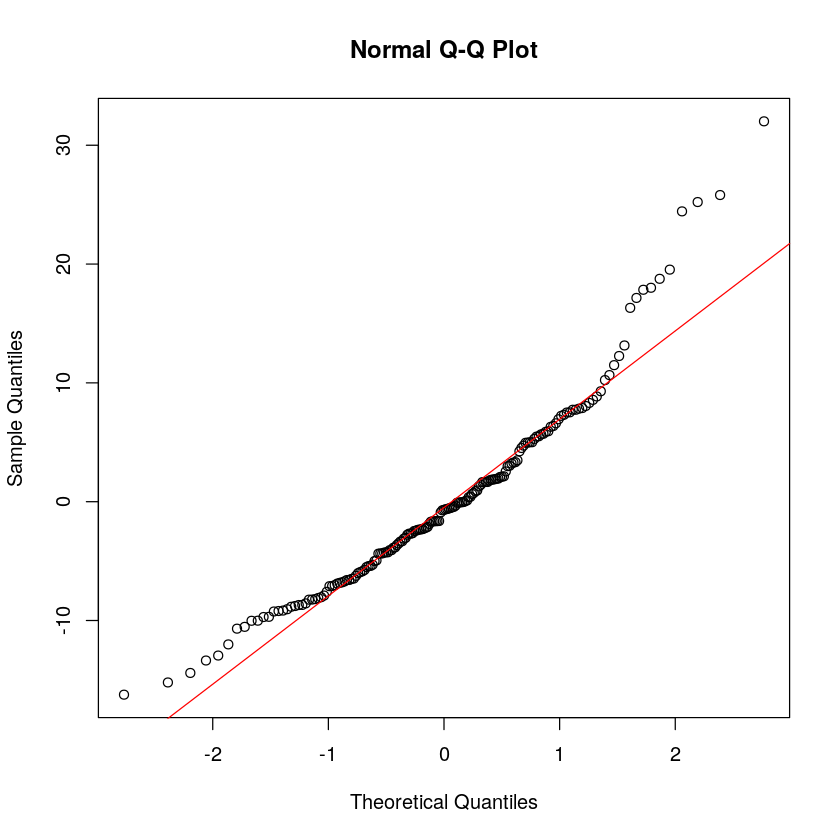

In [94]:
qqnorm(rs)
qqline(rs, col=2)

In [97]:
shapiro.test(rs)
ks.test(rs, "pnorm", mean=0, sd=sd(rs))


	Shapiro-Wilk normality test

data:  rs
W = 0.94197, p-value = 1.348e-06


Warning message in ks.test(rs, "pnorm", mean = 0, sd = sd(rs)):
“ties should not be present for the Kolmogorov-Smirnov test”


	One-sample Kolmogorov-Smirnov test

data:  rs
D = 0.095018, p-value = 0.08184
alternative hypothesis: two-sided
